In [1]:
# Install and load R pakcages that are necessary for the analysis - Packages are collections of R functions, data, 
# and compiled code in a well-defined format. Remove the hash sign to download and install the packages.

#source('http://bioconductor.org/biocLite.R')
#biocLite('phyloseq')
library("phyloseq")
packageVersion("phyloseq")

#biocLite("biomformat")
library("biomformat")
packageVersion("biomformat")

#install.packages("ggplot2")
library("ggplot2")
packageVersion("ggplot2")

#install.packages("vegan")
library("vegan")
packageVersion('vegan')

#install.packages("grid")
library("grid")
packageVersion('grid')

#install.packages("magrittr")
library(magrittr)
packageVersion('magrittr')

library(dplyr)
packageVersion('dplyr')

library(plyr)
packageVersion('plyr')

library(broom)
packageVersion('broom')

library('stringr')
packageVersion('stringr')

library('knitr')
packageVersion('knitr')

library('DESeq2')
packageVersion('DESeq2')

#install.packages("ggfortify")
library('ggfortify')
packageVersion('ggfortify')

[1] ‘1.22.3’

[1] ‘1.6.0’

[1] ‘3.2.1’

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-4


[1] ‘2.5.4’

[1] ‘3.4.4’

[1] ‘1.5’


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] ‘0.8.0.1’

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



[1] ‘1.8.4’

[1] ‘0.5.2’

[1] ‘1.4.0’

[1] ‘1.22’

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:biomformat’:

    colnames, rownames

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.

[1] ‘1.18.1’

[1] ‘0.4.7’

In [2]:
#Make sure the data has the sample names on rows if not just transform the data with t()
abund_table<-read.csv("Known_Cutoff_no_BA.csv",row.names=1,check.names=FALSE)
meta_table<-read.csv("Mapping_file_w_og.csv",row.names=1,check.names=FALSE)
#Transpose the data to have sample names on rows
abund_table<-t(abund_table)

meta_table<-data.frame(meta_table)
#Filter out samples not present in meta_table
abund_table<-abund_table[rownames(abund_table) %in% rownames(meta_table),]

#Now load the taxonomy
OTU_taxonomy<-read.csv("taxonomy_cutoff_no_BA.csv",row.names=1,check.names=FALSE)
#Convert to phyloseq
library(phyloseq)
#Convert the data to phyloseq format
OTU = otu_table(as.matrix(abund_table), taxa_are_rows = FALSE)
TAX = tax_table(as.matrix(OTU_taxonomy))
SAM = sample_data(meta_table)
physeq<-merge_phyloseq(phyloseq(OTU, TAX),SAM)
# Removed Blank
physeq = subset_samples(physeq, ID_OG_MAP != 'Blank_injection_GE1_01_33205.mzXML')
sample_data(physeq)$ID_OG_MAP

[1] 582.T1       586.T5       571.T2       578.cacum.T5 576.T5      
  [6] 581.T4       584.T5       585.T0       601.T1       600.T4      
 [11] 578.T5       596.T2       585.T1       578.T1       601.T5      
 [16] 572.T1       602.T1       577.T4       592.T4       572.T3      
 [21] 578.T2       577.T0       597.T3       596.T1       589.T3      
 [26] 588.T2       599.T2       602.T2       594.T1       597.T2      
 [31] 584.T3       575.T1       570.T4       577.cacum.T5 590.T3      
 [36] 589.T2       573.T2       588.T5       575.T2       594.T5      
 [41] 574.T0       598.T3       581.cacum.T5 598.T0       584.T0      
 [46] 575.T0       601.T0       577.T3       598.T5       580.T5      
 [51] 571.T4       576.T2       581.T2       580.T4       573.T5      
 [56] 600.T2       599.T3       584.T2       599.T5       602.T5      
 [61] 601.T2       583.T2       598.T4       589.T0       595.T2      
 [66] 571.T1       593.T1       589.T1       599.T0       571.cacum.T5
 [71] 580.T0       572.T0       586.T4       592.T1       590.T2      
 [76] 583.cacum.T5 570.T2       574.T2       578.T0       586.T2      
 [81] 572.cacum.T5 588.T1       590.T1       593.T5       577.T2      
 [86] 581.T1       588.T4       574.T5       603.T2       595.T1      
 [91] 585.cacum.T5 582.T2       599.T1       588.T3       572.T4      
 [96] 582.T5       573.T1       593.T2       581.T3       584.cacum.T5
[101] 582.cacum.T5 592.T5       576.T0       602.T4       583.T1      
[106] 574.T4       592.T0       573.T4       578.T4       590.T4      
[111] 574.cacum.T5 591.T5       600.T5       595.T3       590.T5      
[116] 585.T3       570.T1       575.T4       580.T2       596.T0      
[121] 594.T3       600.T0       595.T5       589.T4       589.T5      
[126] 596.T4       582.T0       593.T4       575.T5       583.T5      
[131] 570.cacum.T5 570.T3       592.T3       572.T5       575.T3      
[136] 603.T1       595.T4       602.T0       591.T1       594.T0      
[141] 571.T3       581.T5       580.cacum.T5 580.T3       576.T1      
[146] 570.T5       574.T1       576.T3       588.T0       584.T1      
[151] 583.T3       602.T3       571.T0       593.T0       603.T5      
[156] 573.T0       573.cacum.T5 603.T3       599.T4       570.T0      
[161] 576.T4       597.T1       573.T3       594.T2       603.T4      
[166] 591.T4       582.T3       581.T0       586.T0       597.T0      
[171] 585.T4       586.T1       590.T0       596.T5       586.cacum.T5
[176] 583.T0       584.T4       601.T4       574.T3       585.T5      
[181] 600.T3       598.T1       571.T5       578.T3       596.T3      
[186] 586.T3       585.T2       576.cacum.T5 598.T2       597.T5      
[191] 601.T3       597.T4       583.T4       582.T4       577.T5      
[196] 591.T2       591.T3       595.T0       580.T1       600.T1      
[201] 603.T0       577.T1       591.T0       572.T2       593.T3      
[206] 594.T4       592.T2      
207 Levels: 570.cacum.T5 570.T0 570.T1 570.T2 570.T3 570.T4 ... 603.T5

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18196 1179795 1683833 1744231 2087042 7759084 

[1] "Number of Samples in our Biom Table"


[1] 207

[1] "Number of Sequence variants we have."


[1] 131

[1] "Sequencing depth."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18196 1179795 1683833 1744231 2087042 7759084 

570.T0_RA1_01_33057  583.CT5_BB3_01_33413   595.T1_RE8_01_33117 
                18196                311937                528633 
 572.CT5_BA6_01_33403   583.T3_BB1_01_33180   580.T5_BG2_01_33372 
               531703                577765                662636 
  578.T4_BD5_01_33210  581.T3_BA11_01_33177  584.CT5_BB4_01_33414 
               668860                695223                706019 
 585.CT5_BB5_01_33415 580C.T5_RA12_01_33409  580.T3_BA10_01_33176 
               711040                726698                733067 
  583.T5_BG5_01_33375  577.T5_BF12_01_33369  570.CT5_BA4_01_33401 
               747635                761863                787510 
  576.T1_RD3_01_33099   578.T3_BA9_01_33175  571.CT5_BA5_01_33402 
               799268                816534                823569 
 573.T4_BC12_01_33204   585.T3_BB3_01_33182   582.T5_BG4_01_33374 
               857115                887824                892233 
 582.CT5_BB2_01_33412   581.T2_RG3_01_33141  575.T2_RF10_01_33135 
               910028                919118                933917 
  593.T1_RE6_01_33115 
               944624

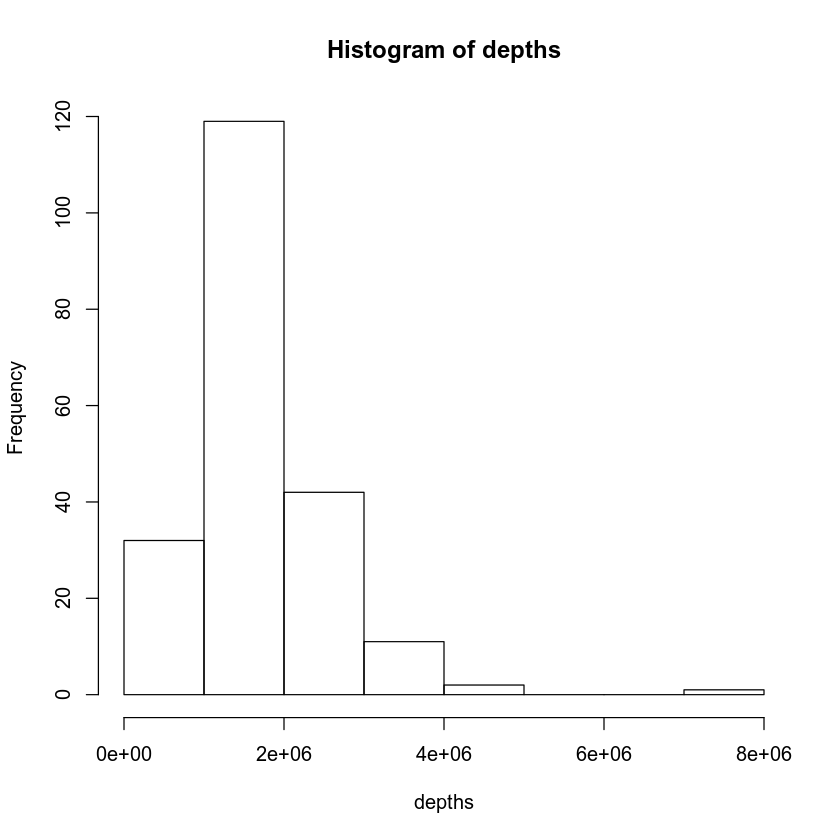

In [3]:
depths <- sample_sums(physeq)
summary(depths)
hist(depths)

# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq)
#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq)),25)

# Metabolite P/LET T2

In [4]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '5')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# Remove Co-P and placebo
physeq.pt.pl = subset_samples(physeq.pt, Category != 'Co-L' & Category != 'Co-P')
unique(sample_data(physeq.pt.pl)$Category)
unique(sample_data(physeq.pt.pl)$Week)

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 1        5        2        cecum.T5 4        0        3       
Levels: 0 1 2 3 4 5 cecum.T5

[1] Placebo   Co-P      Letrozole Co-L     
Levels: Co-L Co-P Letrozole Placebo

[1] 2
Levels: 2

[1] Placebo   Letrozole
Levels: Letrozole Placebo

[1] 2
Levels: 2

In [5]:
diagdds = phyloseq_to_deseq2(physeq.pt.pl, ~ Category)
diagdds$Category = relevel(diagdds$Category, ref = "Letrozole")
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")

converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 47 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [6]:
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
sigtab = res
lower = -15
upper = 15
sigtab= subset(res, log2FoldChange < lower | log2FoldChange > upper)
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.pt.pl)[rownames(sigtab), ], "matrix"))
sigtab = sigtab[order(-abs(sigtab$log2FoldChange)),]
library("ggplot2")
pdf('Known_no_BA_T2_PvsL_DESEQ2.pdf', width=11, height=10)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=4) + scale_x_continuous(minor_breaks=NULL) + coord_fixed(ratio=3) +
  theme(text= element_text(size=20),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5),legend.position = 'none')
           
dev.off()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β -Hydroxy-5-cholestenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β -Hydroxy-5-cholestenoic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β -Hydroxy-5-cholestenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β -Hydroxy-5-cholestenoic acid' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '3β -Hydroxy-5-cholestenoic acid' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion f

png 
  2

# Metabolite Co-L/LET T2

In [14]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '5')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# Remove Co-P and placebo
physeq.pt.pl = subset_samples(physeq.pt, Category != 'Placebo' & Category != 'Co-P')
unique(sample_data(physeq.pt.pl)$Category)
unique(sample_data(physeq.pt.pl)$Week)

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 1        5        2        cecum.T5 4        0        3       
Levels: 0 1 2 3 4 5 cecum.T5

[1] Placebo   Co-P      Letrozole Co-L     
Levels: Co-L Co-P Letrozole Placebo

[1] 2
Levels: 2

[1] Letrozole Co-L     
Levels: Co-L Letrozole

[1] 2
Levels: 2

In [15]:
diagdds = phyloseq_to_deseq2(physeq.pt.pl, ~ Category)
diagdds$Category = relevel(diagdds$Category, ref = "Letrozole")
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
sigtab = res
lower = -15
upper = 15
sigtab= subset(res, log2FoldChange < lower | log2FoldChange > upper)
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.pt.pl)[rownames(sigtab), ], "matrix"))
sigtab = sigtab[order(-abs(sigtab$log2FoldChange)),]
library("ggplot2")
pdf('Known_no_BA_T2_CoLvsL_DESEQ2.pdf', width=11, height=10)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=4) + scale_x_continuous(minor_breaks=NULL) + coord_fixed(ratio=3) +
  theme(text= element_text(size=20),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5),legend.position = 'none')
           
dev.off()

converting counts to integer mode
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [T

png 
  2

# Metabolite P/LET T5

In [20]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '2')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# Remove Co-P and placebo
physeq.pt.pl = subset_samples(physeq.pt, Category != 'Co-L' & Category != 'Co-P')
unique(sample_data(physeq.pt.pl)$Category)
unique(sample_data(physeq.pt.pl)$Week)

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 1        5        2        cecum.T5 4        0        3       
Levels: 0 1 2 3 4 5 cecum.T5

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 5
Levels: 5

[1] Letrozole Placebo  
Levels: Letrozole Placebo

[1] 5
Levels: 5

In [21]:
diagdds = phyloseq_to_deseq2(physeq.pt.pl, ~ Category)
diagdds$Category = relevel(diagdds$Category, ref = "Letrozole")
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
sigtab = res
lower = -15
upper = 15
sigtab= subset(res, log2FoldChange < lower | log2FoldChange > upper)
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.pt.pl)[rownames(sigtab), ], "matrix"))
sigtab = sigtab[order(-abs(sigtab$log2FoldChange)),]
library("ggplot2")
pdf('Known_no_BA_T5_PvsL_DESEQ2.pdf', width=11, height=10)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=4) + scale_x_continuous(minor_breaks=NULL) + coord_fixed(ratio=3) +
  theme(text= element_text(size=20),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5),legend.position = 'none')
           
dev.off()

converting counts to integer mode
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 44 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Methyl γ -linolenate' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Methyl γ -linolenate' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Methyl γ -linolenate' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion

png 
  2

# Metabolite CoL/LET T5

In [22]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '2')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# Remove Co-P and placebo
physeq.pt.pl = subset_samples(physeq.pt, Category != 'Placebo' & Category != 'Co-P')
unique(sample_data(physeq.pt.pl)$Category)
unique(sample_data(physeq.pt.pl)$Week)

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 1        5        2        cecum.T5 4        0        3       
Levels: 0 1 2 3 4 5 cecum.T5

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 5
Levels: 5

[1] Letrozole Co-L     
Levels: Co-L Letrozole

[1] 5
Levels: 5

In [25]:
diagdds = phyloseq_to_deseq2(physeq.pt.pl, ~ Category)
diagdds$Category = relevel(diagdds$Category, ref = "Letrozole")
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
sigtab = res
lower = -15
upper = 15
sigtab= subset(res, log2FoldChange < lower | log2FoldChange > upper)
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(physeq.pt.pl)[rownames(sigtab), ], "matrix"))
sigtab = sigtab[order(-abs(sigtab$log2FoldChange)),]
library("ggplot2")
pdf('Known_no_BA_T5_CoLvsL_DESEQ2.pdf', width=11, height=10)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=4) + scale_x_continuous(minor_breaks=NULL) + coord_fixed(ratio=1.5) +
  theme(text= element_text(size=20),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5),legend.position = 'none')
           
dev.off()

converting counts to integer mode
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [T

png 
  2